<a href="https://colab.research.google.com/github/tejaswi1995prakash/ATR-STRANGLE-RESULTS/blob/main/Ad_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**

Forecasting the number of views so that we can predict and optimize the ad placement for our clients. We are provided with the data of 145k wikipedia pages and daily view count for each of them. Our clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading some basic packages

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Reading the data and storing them as dataframes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/scaler/data/Ad_ease/train_1.csv')
exog = pd.read_csv('/content/drive/MyDrive/scaler/data/Ad_ease/Exog_Campaign_eng')

In [ ]:
df

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              NaN         NaN         NaN  ...        48.0         9.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4             25.0        13.0         3.0        11.0        27.0   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             13.0        36.0        10.0  
...            ...         ...         ...  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[145063 rows x 551 columns]

In [ ]:
df.shape

(145063, 551)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


The train data has 145063 rows and 551 columns. That is we have 145063 wikipedia pages and we have daily we count for each page for about 551 days from 2015-07-01 to 2016-12-31

In [ ]:
exog

Exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

The exog data has 550 rows and just one column. The rows represent the days and the column represents the happening of a campaign or a significant event. It is also to be noted that the campaigns here are just for english pages.

In [ ]:
print("Checking for missing values")
print("Total number of records: ", df.shape[0])
print("Total number of rows containing 1 or more missing value: ",df[df.isnull().any(axis=1)].shape[0])
print("% of missing values: ", round(df[df.isnull().any(axis=1)].shape[0]/df.shape[0],2)*100)

Checking for missing values
Total number of records:  145063
Total number of rows containing 1 or more missing value:  27786
% of missing values:  19.0


There are 27786 rows with missing values which accounts to 19% of the dataset.
This missing values could be because there might be no clicks on that particular day. Hence it would be wise to impute it with 0

In [ ]:
df.fillna(0,inplace=True)

Let's now try to decompose the page column to get multiple attributes like language, name, access type and access origin. We shall use regex to extract attributes

In [ ]:
import regex as re
def page_language(x):
    res = re.search('[a-z][a-z].wikipedia.org',x)
    if res:
        return res[0][0:2]
    return 'na'
def page_name(x):
    res = re.search('[_][a-z][a-z].wikipedia.org',x)
    if res:
      return(x.split(res[0])[0])
    return('na')
def page_access_type(x):
    res = re.search('[_][a-z][a-z].wikipedia.org',x)
    if res:
      return(x.split(res[0])[-1].split("_")[1])
    return("na")
def page_access_origin(x):
    res = re.search('[_][a-z][a-z].wikipedia.org',x)
    if res:
      return(x.split(res[0])[-1].split("_")[-1])
    return("na")

In [ ]:
df['language'] = df['Page'].apply(lambda x : page_language(x))
df['page_name'] = df['Page'].apply(lambda x : page_name(x))
df['access_type'] = df['Page'].apply(lambda x : page_access_type(x))
df['access_origin'] = df['Page'].apply(lambda x : page_access_origin(x))

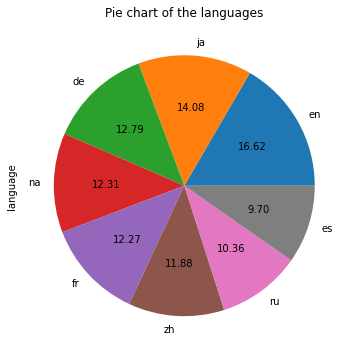

In [ ]:
df['language'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title("Pie chart of the languages")
plt.show()

From the graph we can see that English accounts for 16.62% of the data and the least belongs to spanish

In [ ]:
df[df['language'] == 'na']

Page  2015-07-01  \
13332    Accueil_commons.wikimedia.org_all-access_spider        55.0   
13333  Atlas_of_Asia_commons.wikimedia.org_all-access...         5.0   
13334  Atlas_of_Europe_commons.wikimedia.org_all-acce...         4.0   
13335  Atlas_of_World_War_II_commons.wikimedia.org_al...         5.0   
13336  Atlas_of_colonialism_commons.wikimedia.org_all...         8.0   
...                                                  ...         ...   
84730  help:contents_www.mediawiki.org_all-access_spider         NaN   
84731  how_to_contribute_www.mediawiki.org_all-access...         0.0   
84732      mediawiki_www.mediawiki.org_all-access_spider         0.0   
84733   special:book_www.mediawiki.org_all-access_spider         0.0   
84734  special:translate_www.mediawiki.org_all-access...         0.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
13332        48.0        44.0        35.0        46.0        41.0        32.0   
13333         3.0         4.0         6.0         3.0         1.0         5.0   
13334         6.0         9.0         7.0         6.0         4.0         5.0   
13335         2.0         6.0         6.0         8.0        11.0         5.0   
13336         6.0        15.0         5.0         5.0         9.0        10.0   
...           ...         ...         ...         ...         ...         ...   
84730         0.0         NaN         NaN         0.0         0.0         NaN   
84731         0.0         0.0         0.0         0.0         0.0         0.0   
84732         0.0         0.0         0.0         0.0         0.0         0.0   
84733         0.0         0.0         0.0         0.0         NaN         0.0   
84734         0.0         0.0         0.0         0.0         1.0         NaN   

       2015-07-08  2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  \
13332        43.0        40.0  ...        88.0        57.0        74.0   
13333         6.0         6.0  ...        31.0        29.0        37.0   
13334         6.0        13.0  ...        35.0        31.0        31.0   
13335         5.0         6.0  ...         8.0         8.0        13.0   
13336         3.0         9.0  ...        29.0        19.0        30.0   
...           ...         ...  ...         ...         ...         ...   
84730         NaN         0.0  ...         7.0        18.0        17.0   
84731         0.0         0.0  ...         2.0       172.0        19.0   
84732         0.0         0.0  ...        11.0        12.0        51.0   
84733         0.0         0.0  ...       300.0         3.0        44.0   
84734         NaN         0.0  ...       346.0         2.0        28.0   

       2016-12-29  2016-12-30  2016-12-31  language  page_name  access_type  \
13332        61.0        51.0        60.0        na         na           na   
13333        32.0        29.0        34.0        na         na           na   
13334        34.0        28.0        27.0        na         na           na   
13335         5.0        11.0         6.0        na         na           na   
13336        29.0        26.0        26.0        na         na           na   
...           ...         ...         ...       ...        ...          ...   
84730        15.0         3.0        11.0        na         na           na   
84731        29.0         2.0       178.0        na         na           na   
84732        23.0         3.0        48.0        na         na           na   
84733         6.0         0.0       154.0        na         na           na   
84734         4.0       163.0         1.0        na         na           na   

       access_origin  
13332             na  
13333             na  
13334             na  
13335             na  
13336             na  
...              ...  
84730             na  
84731             na  
84732             na  
84733             na  
84734             na  

[17855 rows x 555 columns]

The one thing we observe with all the pages that didn't specify language in the link was that all of them are wikimedia or mediawiki pages and not wikipedia pages. It is important to know that Wikimedia is a non-profit organization that supports Wikipedia (and its sister projects). So in general does Wikimedia pages garner more views than wikipedia?


Wikipedia Vs WikiMedia

In [ ]:
dates = df[df['language'] == 'na'].mean().to_frame().reset_index()['index']
wikimedia_values = df[df['language'] == 'na'].mean().to_frame().reset_index()[0]
wikipedia_values = df[df['language'] != 'na'].mean().to_frame().reset_index()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


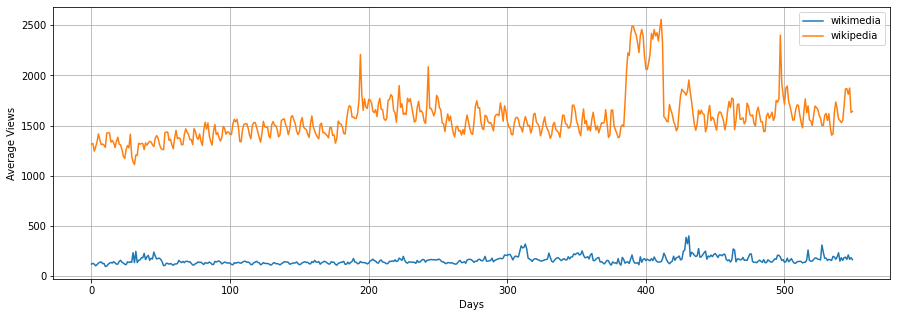

In [ ]:
fig = plt.figure(1,figsize=[15,5])
plt.ylabel('Average Views')
plt.xlabel('Days')
plt.plot([x for x in range(len(dates))],wikimedia_values,label = 'wikimedia')
plt.plot([x for x in range(len(dates))],wikipedia_values,label = 'wikipedia')
plt.legend()
plt.grid()
plt.show()

Observation: Wikipedia pages in general have higher average views as opposed to Wikimedia pages 

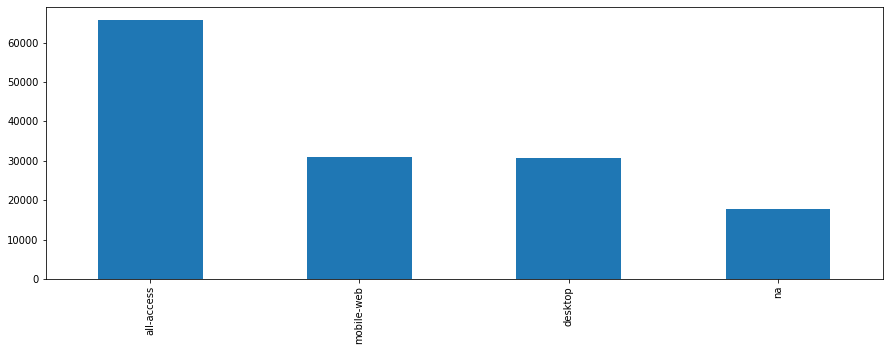

In [ ]:
df['access_type'].value_counts().plot(kind='bar',figsize=(15,5))

In [ ]:
df['access_origin'].value_counts()

all-agents    96594
spider        30614
na            17855
Name: access_origin, dtype: int64

The above graph shows the access origin types for every type

While I was going through the page names of some wiki pages, I found something peculiar. Some of the page names ended with .jpg This tells us that some of the wikipedia pages here are just link to photos. Now the natural follow up question is does advertising on such a link make sense? Let's find out by doing some analysis

In [ ]:
def is_jpg(x):
    res = re.search('(.jpg|.JPG)$',x)
    if res:
      return(1)
    return(0)

df['jpg'] = df['page_name'].apply(lambda x : is_jpg(x))

In [ ]:
df[df['jpg'] == 1].shape

(45, 556)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


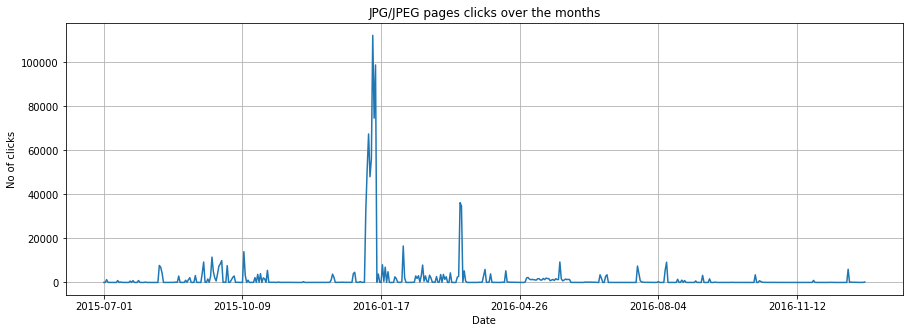

In [ ]:
df[df['jpg'] == 1].iloc[:,:-5].mean().plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("JPG/JPEG pages clicks over the months")
plt.xlabel("Date")
plt.ylabel("No of clicks")
plt.show()

When we analyze the JPG/JPEG pages we see that there is a spike in January of 2017. This has to be an outlier. This data however looks stationary. There seems to be no trend or seasonality in the data. We can confirm the same with the help of Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[df['jpg'] == 1].iloc[:,:-5].mean(), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.835463
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570
Reject Ho - Time Series is Stationary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


With the confirmation of stationarity of the JPG/JPEG pages, it makes no sense to advertise on JPG/JPEG pages. A page which is stationary means that there is no trend or seasonality. With the ocassional spikes in JPEG pages, it is hard to find consistent users for those pages making it a unreliable page for advertising.

In [ ]:
jpg_df = df[df['jpg'] == 1].iloc[:,:-5]

In [ ]:
jpg_df['total_visits'] = df[df['jpg'] == 1].iloc[:,:-5].sum(axis=1,skipna=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Let's now look at top 5 jpg/jpeg pages with number of clicks. We shall also see a snapshot of the webpage with the most number of total visits

In [ ]:
jpg_df.sort_values(by='total_visits',ascending=False)[['Page','total_visits']].head(5)

Page  total_visits
37938   File:Evander_Holyfield_LA_2011.jpg_en.wikipedi...     4398728.0
9109    File:Evander_Holyfield_LA_2011.jpg_en.wikipedi...     4396489.0
97563   ????:Andrey_Belloly_1.jpg_ru.wikipedia.org_all...      610424.0
101305  ????:Andrey_Belloly_1.jpg_ru.wikipedia.org_des...      609979.0
140687  Datei:Schwarzachklamm_44.jpg_de.wikipedia.org_...      358978.0

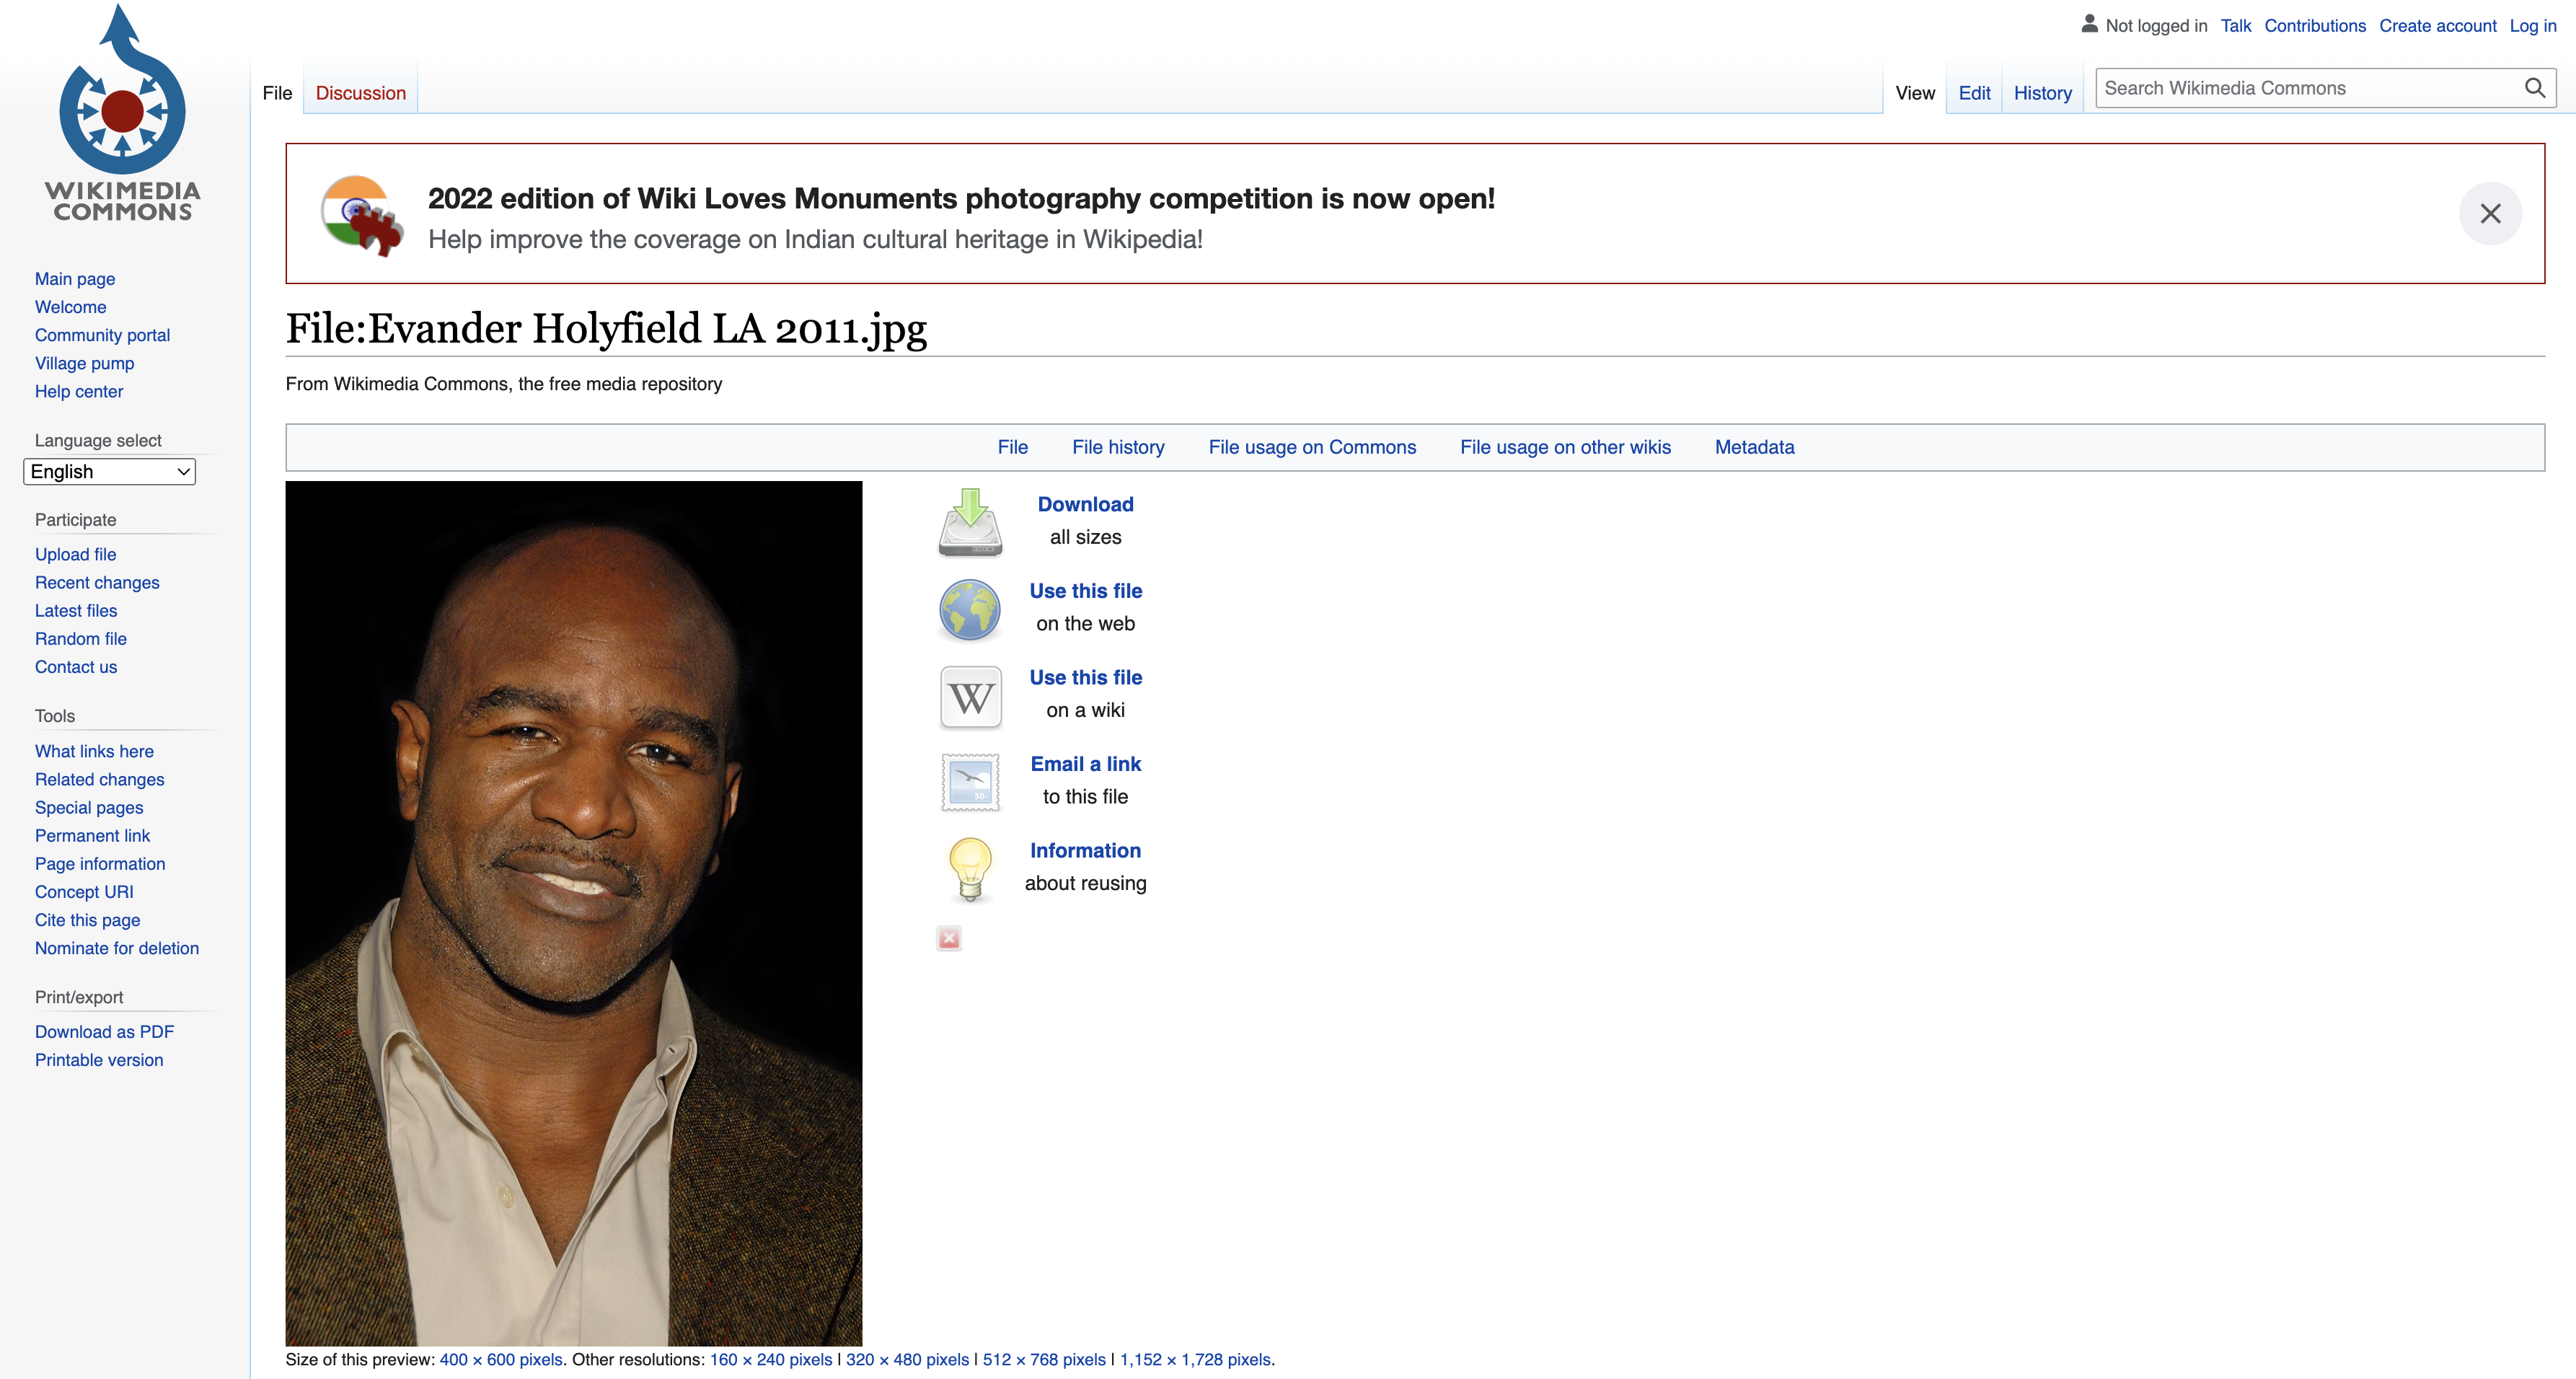

The above image is a snapshot of the jpg/jpeg page with the most number of visits

# All langauge time series 

Let's now try to understand if langauges have effect on number of clicks, Do all the langauges have the same trend or do they differ significantly? We shall melt all the values of a particular language to a single row which will represent the mean value. This mean value represents how many clicks on an average a particular wikipedia language page gets on a single day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



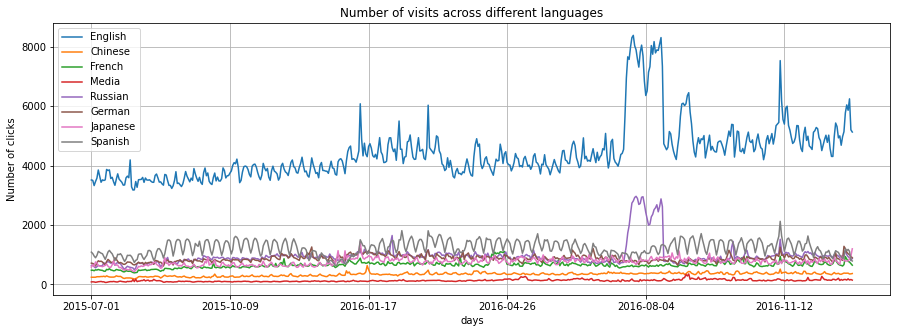

In [ ]:
all_languages = df[df['language'] == 'en'].mean().to_frame().iloc[:-1,:].reset_index().rename(columns={0:'en'})
for i in df['language'].unique():
  tdf = df[df['language'] == i].mean().to_frame().reset_index().iloc[:-1,:].rename(columns={0:i})
  all_languages[i] = tdf[i]
all_languages.rename(columns={'en':'English','zh':'Chinese','fr':'French','na':'Media','ru':'Russian','de':'German','ja':'Japanese','es':'Spanish'},inplace=True)
all_languages.set_index("index").plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("Number of visits across different languages")
plt.xlabel("days")
plt.ylabel("Number of clicks")
plt.show()

In [ ]:
all_languages.mean().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



English     4430.725397
Spanish     1226.448930
Russian      968.079038
German       868.752482
Japanese     762.770492
French       651.389886
Chinese      334.740615
Media        130.218676
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



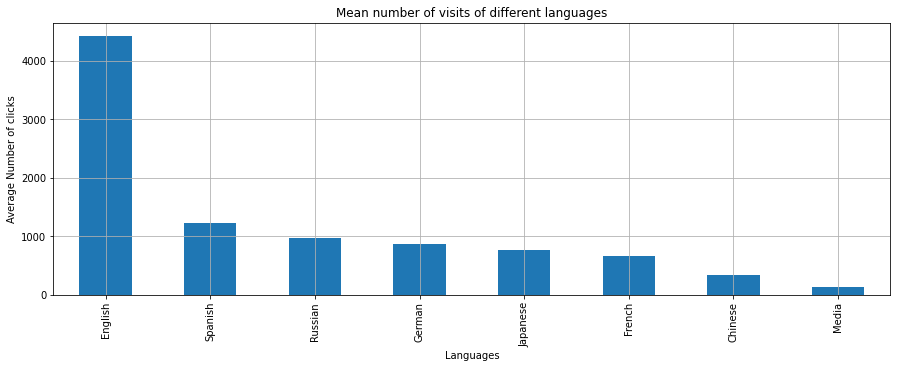

In [ ]:
all_languages.mean().sort_values(ascending = False).plot(kind = 'bar',figsize=(15,5))
plt.grid()
plt.title("Mean number of visits of different languages")
plt.xlabel("Languages")
plt.ylabel("Average Number of clicks")
plt.show()

Observations: 

* English language has the highest number of visits per day, followed by Spanish. 
* The least number of clicks are for the media pages
* We can see that English and Russian pages are highly correlated considering the fact that they have spikes at similar levels
* We also see some spikes in the data. Ideally let's clip them to 95% values

In [ ]:
for i in all_languages.set_index('index').columns:
  all_languages[i] = np.where(all_languages[i] > all_languages[i].quantile(0.95),all_languages[i].quantile(0.95),all_languages[i])

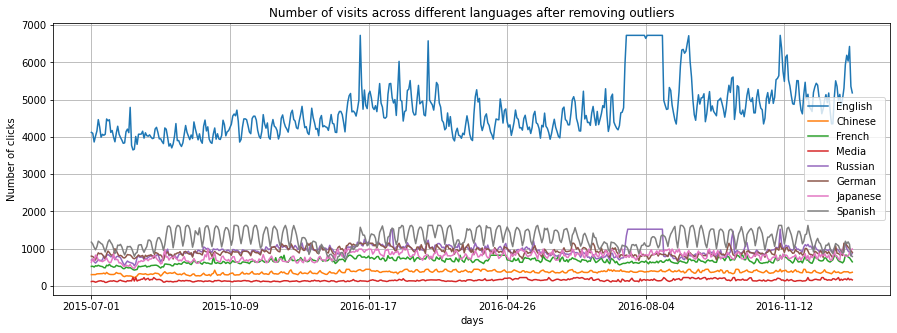

In [ ]:
all_languages.set_index("index").plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("Number of visits across different languages after removing outliers")
plt.xlabel("days")
plt.ylabel("Number of clicks")
plt.show()

Let's now check if the data is stationary for these languages. We shall use AD Fuller test to check if the data is stationary


**Stationariity Test**

In [ ]:
for i in all_languages.set_index("index").columns:
  print("Result for ",i)
  result = adfuller(all_languages[i], autolag='AIC')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
  else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
  print("******************************************************")

Result for  English
ADF Statistic: -2.444458
p-value: 0.129579
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary
******************************************************
Result for  Chinese
ADF Statistic: -1.975847
p-value: 0.297263
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary
******************************************************
Result for  French
ADF Statistic: -2.375358
p-value: 0.148813
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary
******************************************************
Result for  Media
ADF Statistic: -3.282926
p-value: 0.015659
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570
Reject Ho - Time Series is Stationary
******************************************************
Result for  Russian
ADF Statistic: -3.876570
p-value: 0.002214
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570
Reje

Inference from the AD Fuller Test

* English, Chinese, French, German & Japanese are the languages which are non stationary
*  Media, Russian and Spanish are stationary time series data

**Analyzing English Web Pages**

In [ ]:
all_languages['index'] = pd.to_datetime(all_languages['index'])

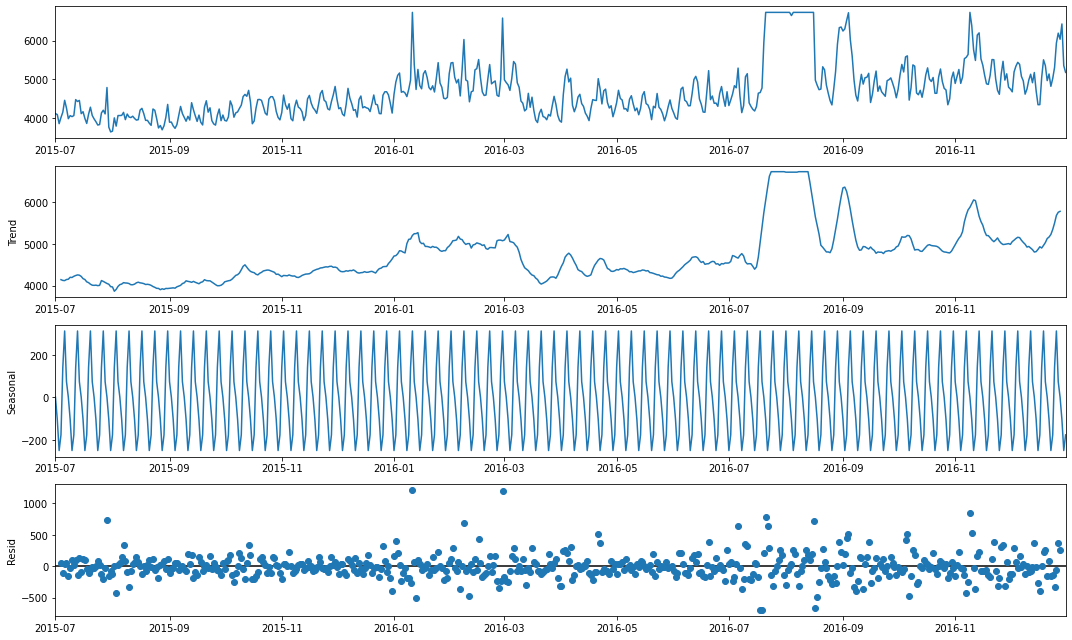

In [ ]:
import statsmodels.api as sm 
model = sm.tsa.seasonal_decompose(all_languages[['index','English']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

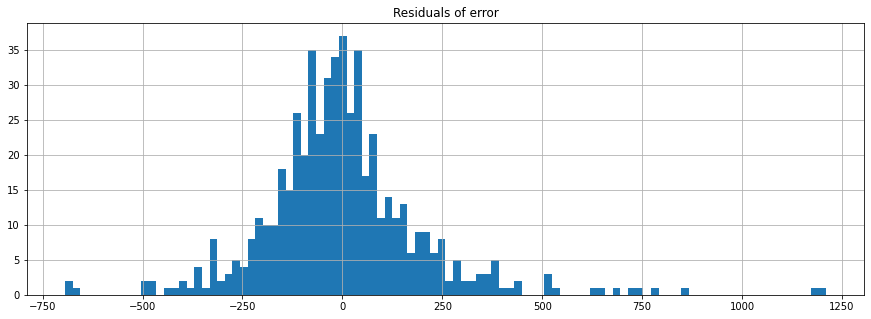

In [ ]:
model.resid.hist(bins=100,figsize=(15,5))
plt.title('Residuals of error')
plt.show()

In [ ]:
model.resid.mean()

-0.08045337562489581

The mean of errors for english webpages is -0.08 which is very close to 0 and the error distribution looks normal

**De-Trending of English Web Pages**

We do the de trending in order to find the seasonality

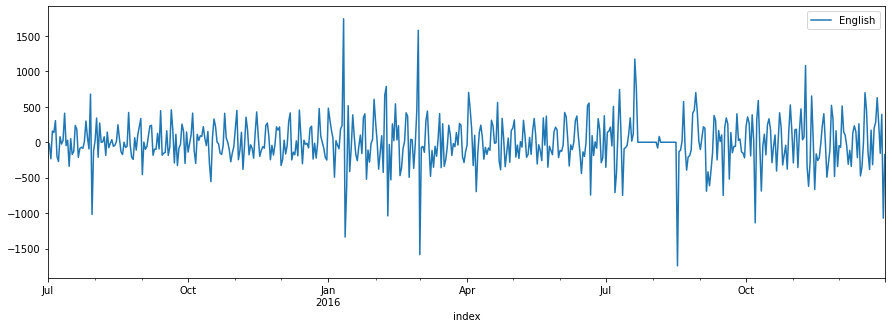

In [ ]:
english_detrended = all_languages[['index','English']].set_index('index').diff()
english_detrended.plot(figsize=(15,5))
plt.show()

**De-Seasonalizing of English Web pages**

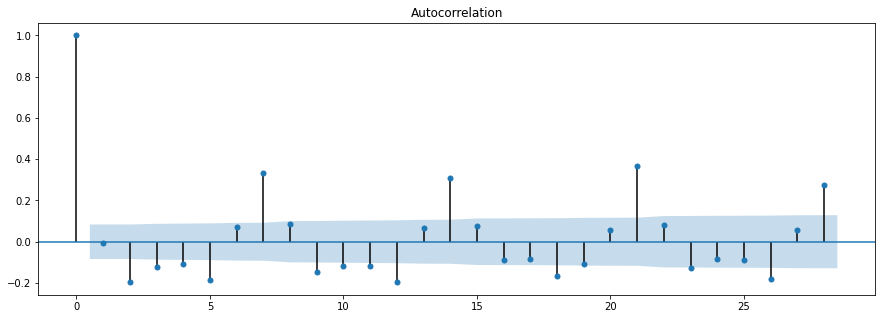

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(english_detrended.dropna(),ax=ax);

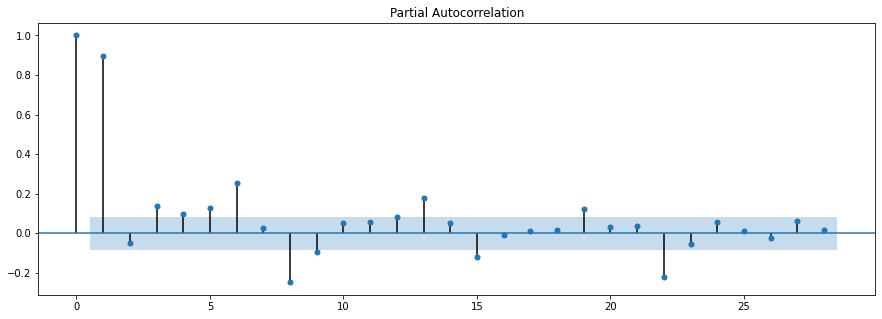

In [ ]:
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(all_languages[['index','English']].set_index('index'),ax=ax);

ACF plot is useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.

From ACF plot we can see that there is a seasonality in the given time series on 7th day, 14th day, 21day and 28th day

Can the observed time series be modeled with an MA model? If yes, what is the order?


**Analyzing Chinese Web Pages**

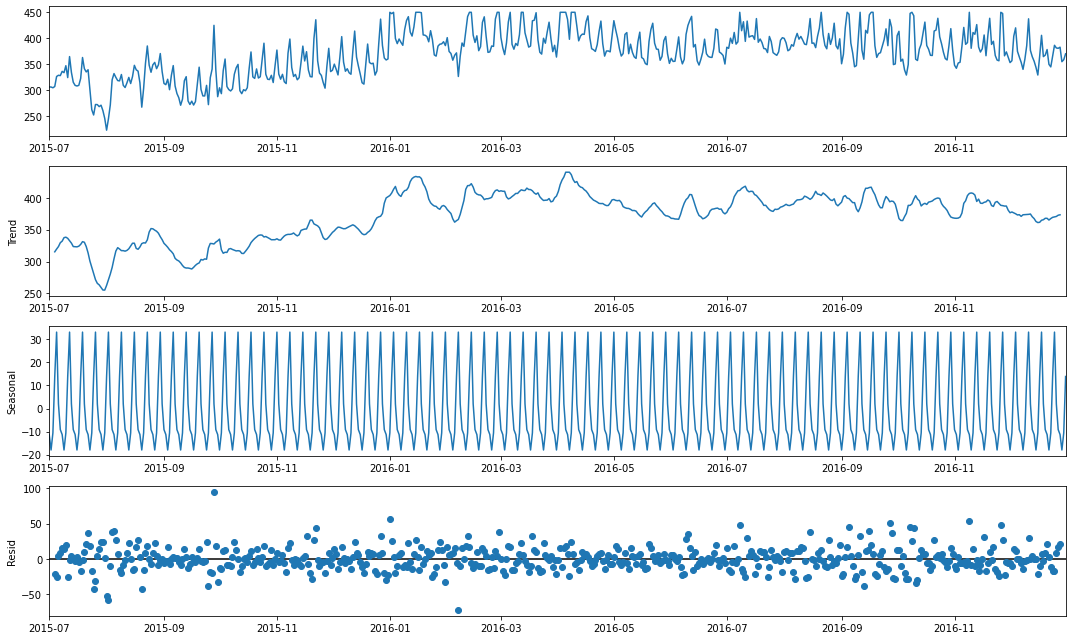

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','Chinese']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

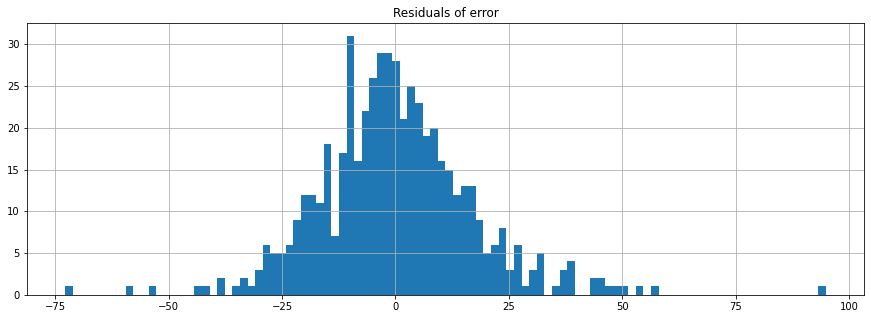

In [ ]:
model.resid.hist(bins=100,figsize=(15,5))
plt.title('Residuals of error')
plt.show()

In [ ]:
model.resid.mean()

0.0021480525241419895

The mean of errors is 0 and the errors look normally distributed 

**De-Trending of Chinese Web Pages**


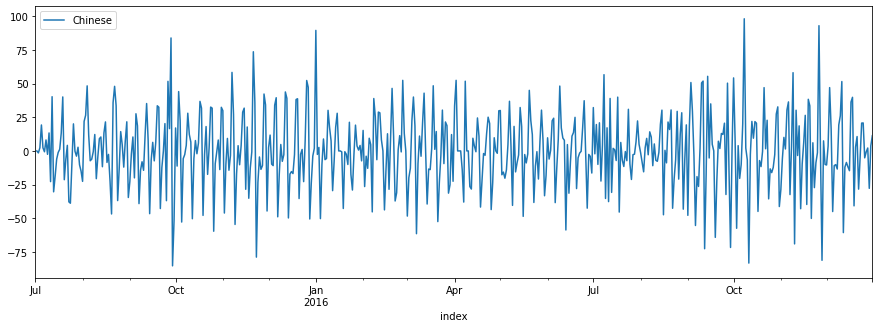

In [ ]:
chinese_detrended = all_languages[['index','Chinese']].set_index('index').diff()
chinese_detrended.plot(figsize=(15,5))
plt.show()

**De-Seasonalizing of Chinese Web pages**

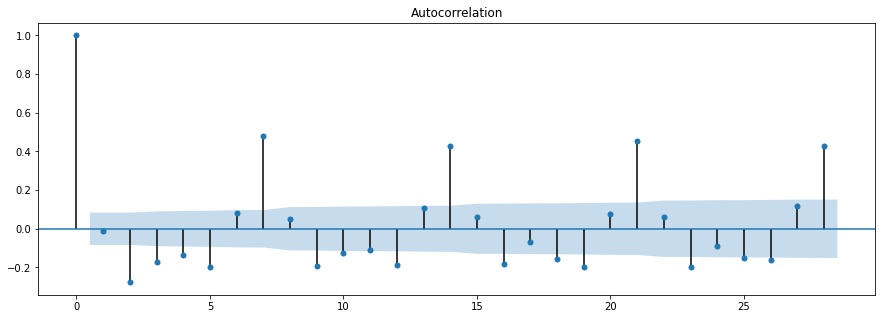

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(chinese_detrended.dropna(),ax=ax);

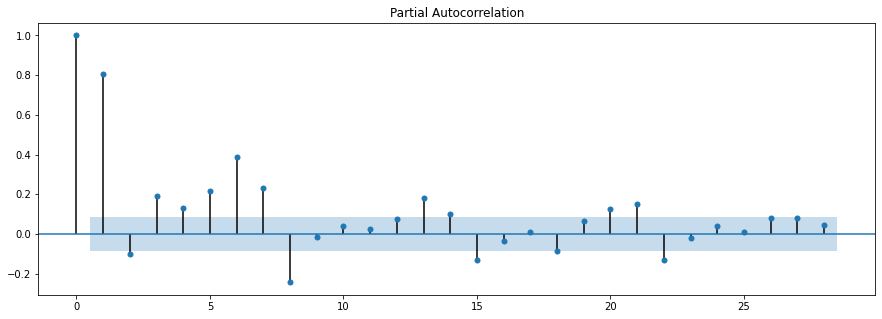

In [ ]:
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(all_languages[['index','Chinese']].set_index('index'),ax=ax);

**Inference**

ACF plot shows that there is seasonality in the Chinese time series data with seasonality occuring after 7, 14, 21 and 28 days

**Analyzing German Web Pages**

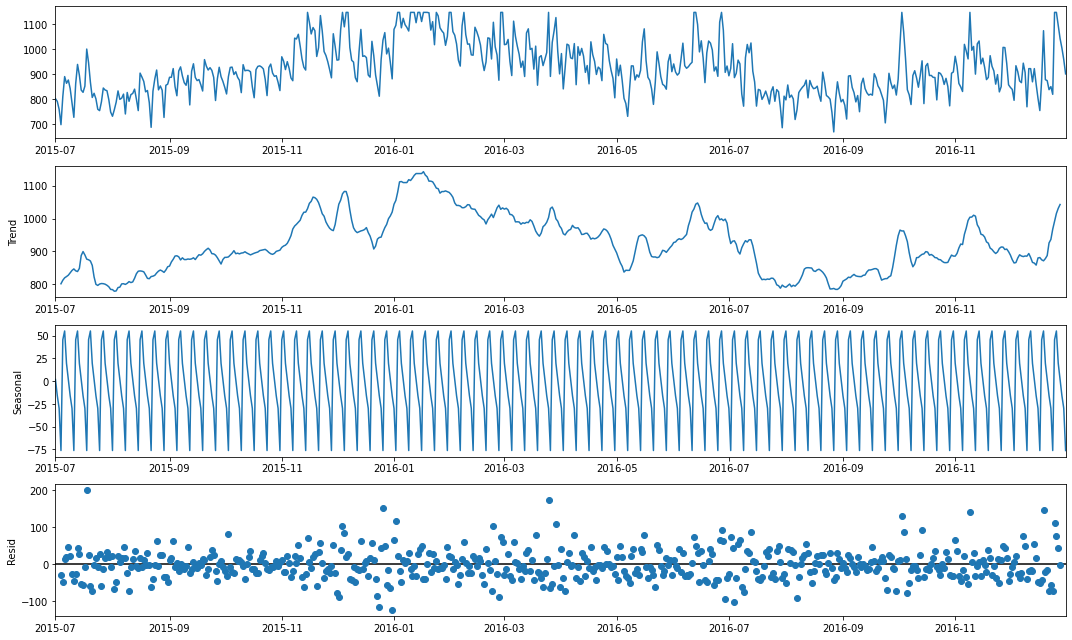

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','German']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

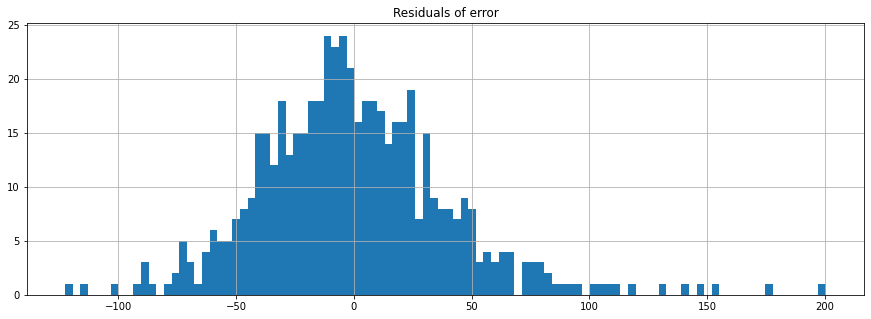

In [ ]:
model.resid.hist(bins=100,figsize=(15,5))
plt.title('Residuals of error')
plt.show()

In [ ]:
model.resid.mean()

0.06797842317696062

The mean of errors is close to 0 and looks normally distributed with outliers at the right end

**De-Trending of German Web Pages**

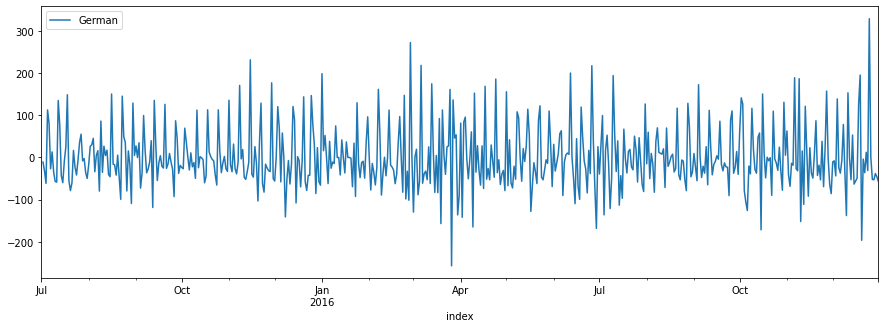

In [ ]:
german_detrended = all_languages[['index','German']].set_index('index').diff()
german_detrended.plot(figsize=(15,5))
plt.show()

**De-Seasonalizing of German Web pages**

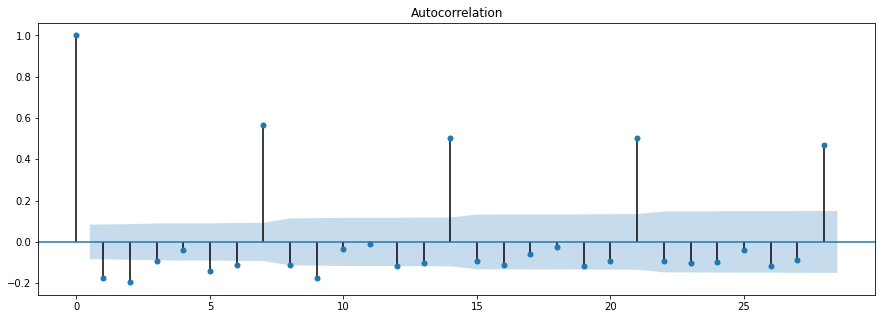

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(german_detrended.dropna(),ax=ax);

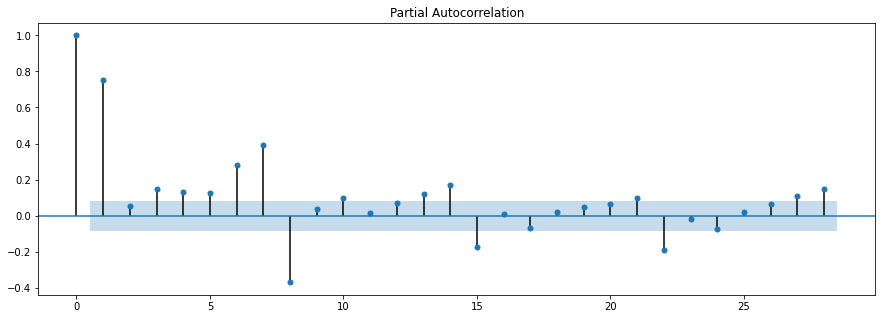

In [ ]:
N, M = 15, 5
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(all_languages[['index','German']].set_index('index'),ax=ax);

Plotting the decomposition graph for the remaining languages

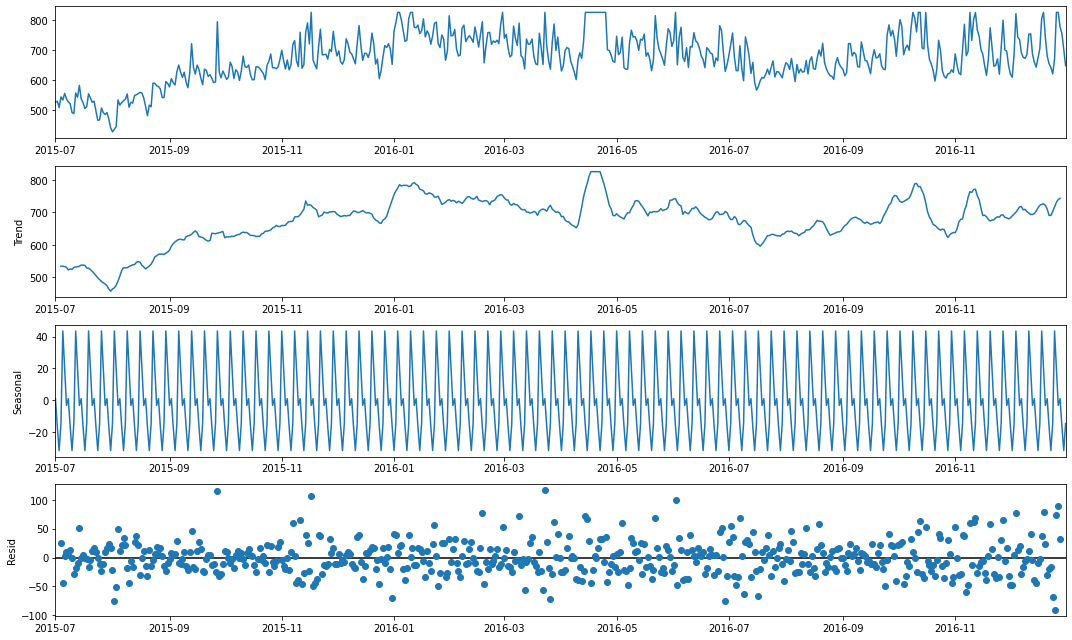

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','French']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

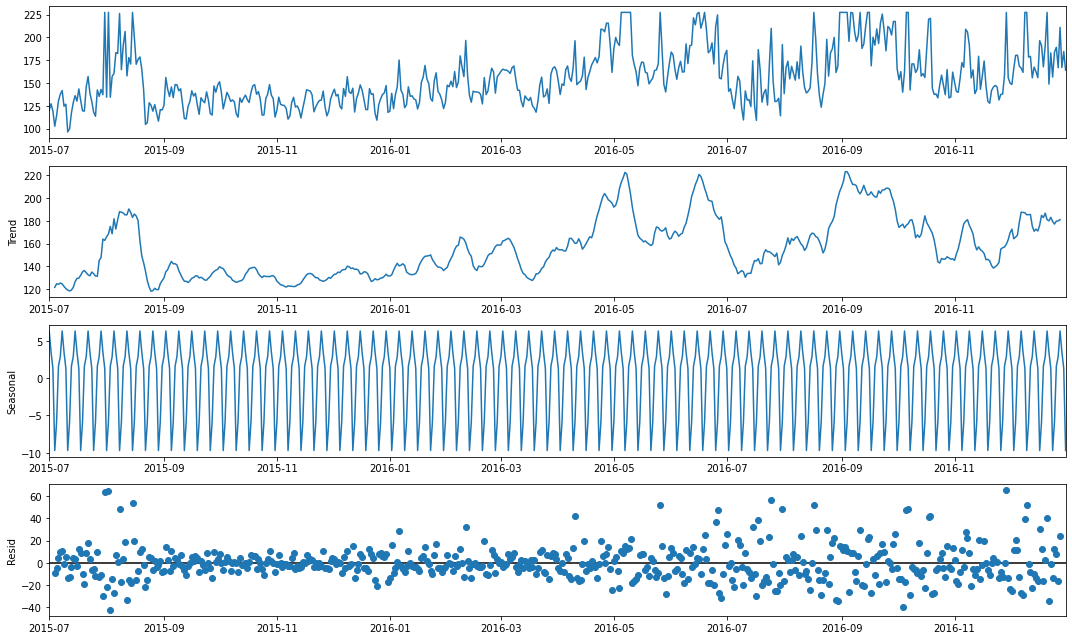

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','Media']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

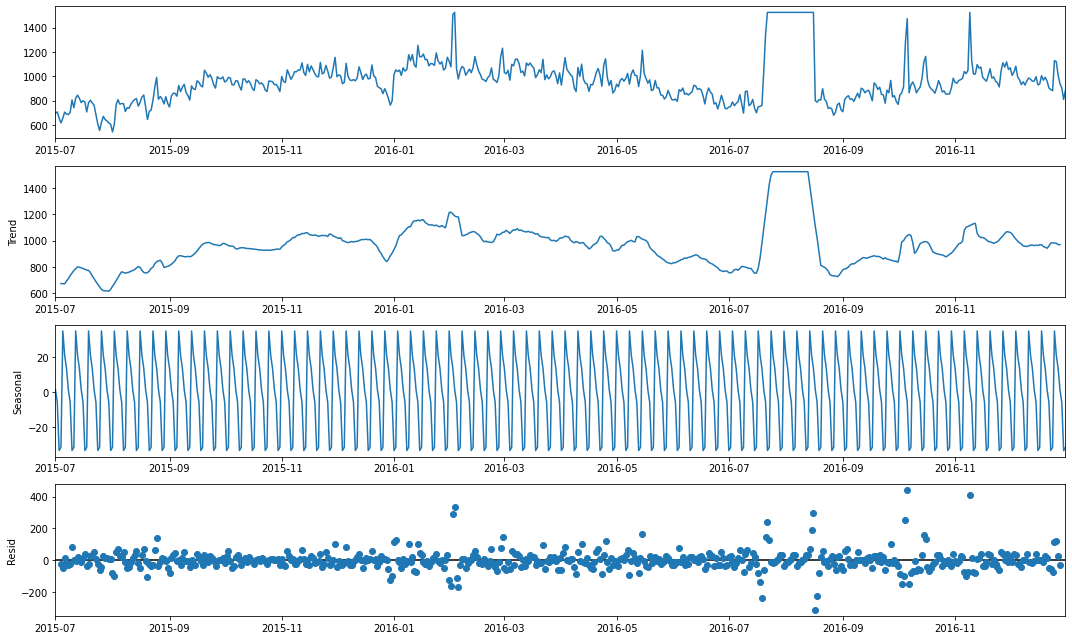

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','Russian']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

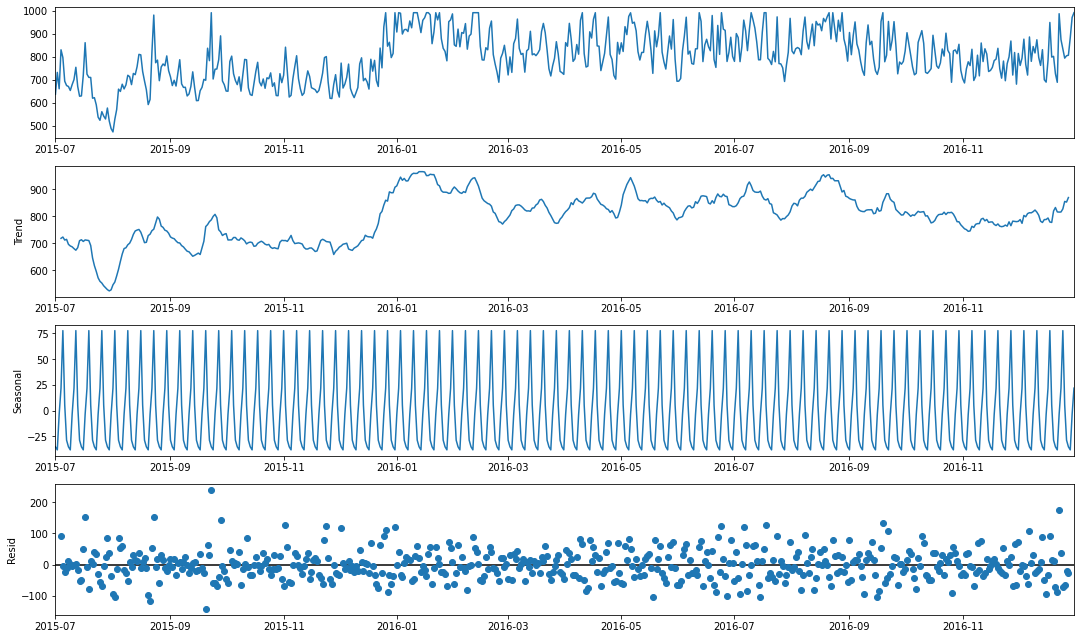

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','Japanese']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

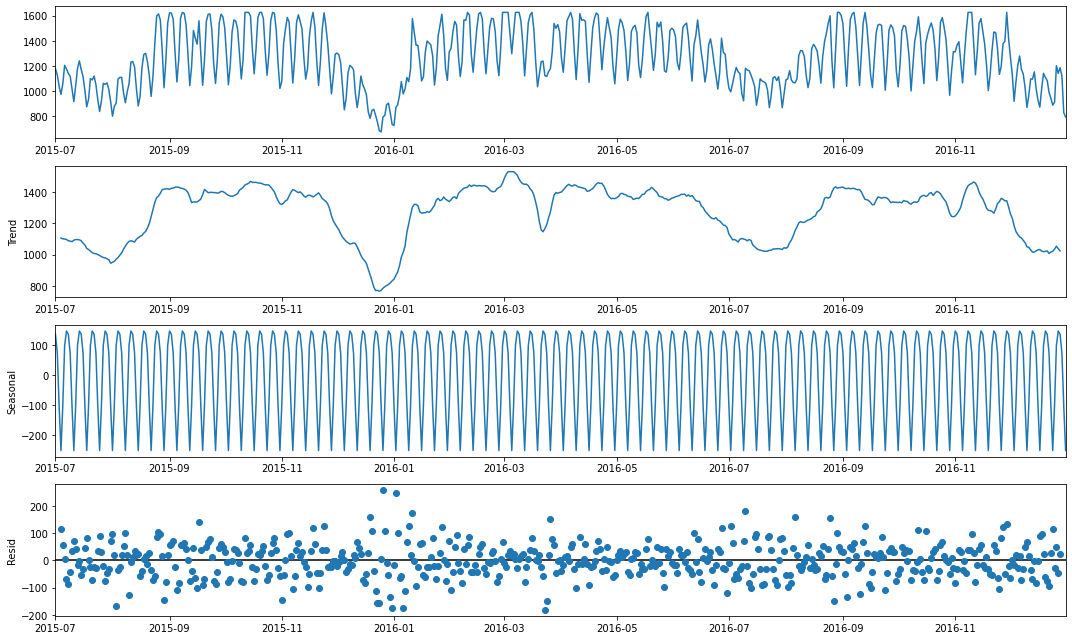

In [ ]:
model = sm.tsa.seasonal_decompose(all_languages[['index','Spanish']].set_index('index'),model='additive')
fig = model.plot()
fig.set_size_inches((15,9))
fig.tight_layout()

###Train-Test split & Metrics

In [ ]:
train_x = all_languages.loc[all_languages.index < all_languages.index[-50]].copy()
test_x = all_languages.loc[all_languages.index >= all_languages.index[-50]].copy()

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)
# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
train_x.set_index('index',inplace=True)

**Mean Model**

MAE : 562.011
RMSE : 704.079
MAPE: 0.102


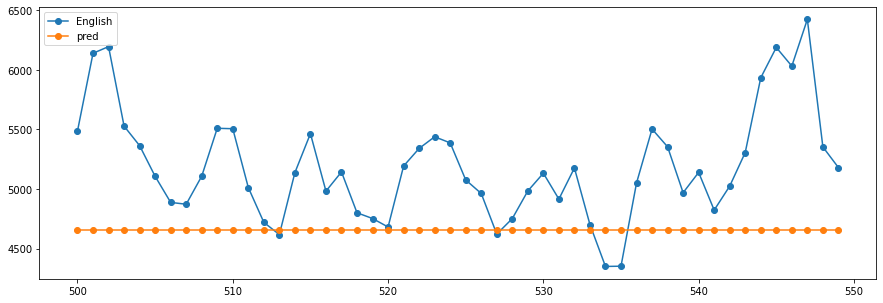

In [ ]:
#train mean as test predicted
test_x['pred'] = train_x['English'].mean()
test_x['English'].plot(style='-o',figsize=(15,5))
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

**Naive Forecasts**

MAE : 660.914
RMSE : 729.16
MAPE: 0.133


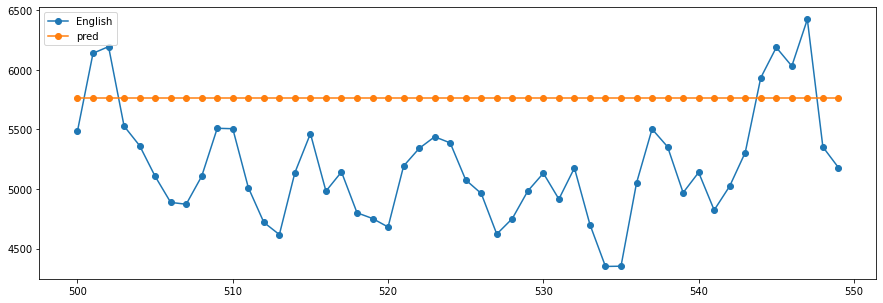

In [ ]:
## Last value as the value at all future values: high variance model
test_x['pred'] = train_x['English'][-1]
test_x['English'].plot(style='-o',figsize=(15,5))
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

**ARIMA(p,d,q)**

In [ ]:
train_x.reset_index(inplace=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import datetime as dt
params = {
        'p': [1, 2, 3],
        'd': [1, 2],
        'q': [1, 2, 3],
        }

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAE : 813.237
RMSE : 880.55
MAPE: 0.163


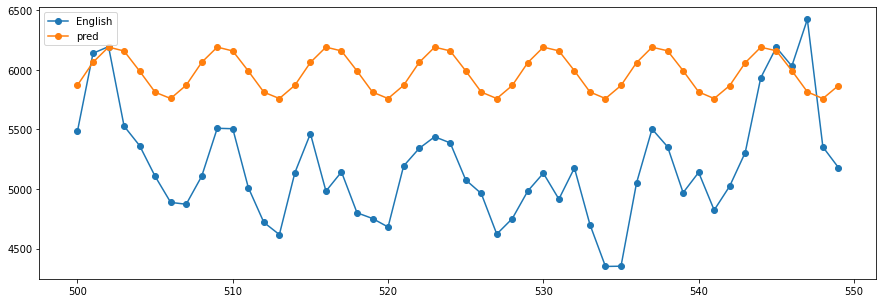

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.English, order=(3, 1, 3))
# RandomizedSearchCV(model, param_distributions=params)
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x['English'].plot(style='-o',figsize=(15,5))
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()
plt.show()

**SARIMA(p,d,q,P,D,Q,s)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAE : 573.466
RMSE : 631.343
MAPE: 0.114


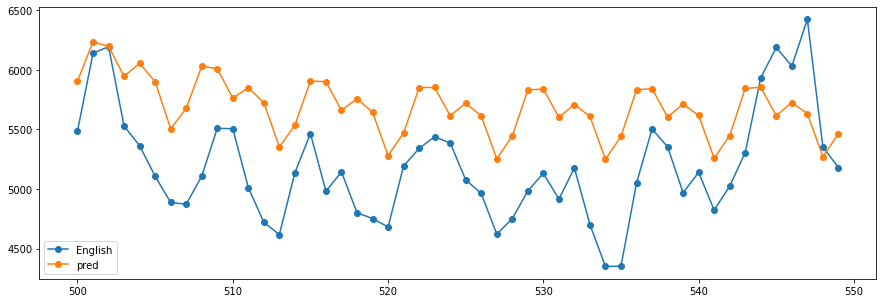

In [ ]:
model = SARIMAX(train_x.English, order=(3, 1, 3), seasonal_order=(1,1,1,7))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x['English'].plot(style='-o',figsize=(15,5))
test_x['pred'].plot(style='-o')
performance(test_x['English'], test_x['pred'])
plt.legend()

In [ ]:
all_languages['Exog'] = exog['Exog']

In [ ]:
all_languages

index      English     Chinese      French       Media      Russian  \
0   2015-07-01  4120.242704  306.174324  526.624206  120.165592   694.492845   
1   2015-07-02  4096.969675  306.180041  530.038727  127.193583   706.667866   
2   2015-07-03  3863.318780  304.711372  509.429958  119.130165   654.068973   
3   2015-07-04  4020.385549  307.106882  544.347518  102.536659   615.880100   
4   2015-07-05  4157.757910  326.373163  534.101778  114.300295   655.269262   
..         ...          ...         ...         ...         ...          ...   
545 2016-12-27  6189.329381  380.391169  825.957589  166.680211  1008.121724   
546 2016-12-28  6032.638712  382.556091  777.255710  211.060804   938.610821   
547 2016-12-29  6425.295920  354.776010  755.727032  167.100070   903.053531   
548 2016-12-30  5353.679346  358.554506  703.626382  184.586077   808.817615   
549 2016-12-31  5180.347343  369.829429  648.626656  164.086632   886.737728   

          German    Japanese      Spanish  Exog  
0     801.433519  637.635044  1176.993529     0  
1     790.469330  732.300645  1125.926357     0  
2     758.689914  661.188706  1035.044477     0  
3     697.106317  830.489442   972.426566     0  
4     809.890360  796.904439  1056.349179     0  
..           ...         ...          ...   ...  
545  1095.848843  804.676399  1138.872438     1  
546  1042.817652  806.809621  1184.690560     1  
547  1004.514348  883.427658  1117.971921     1  
548   958.359915  970.883847   825.957059     0  
549   900.882241  991.608202   791.449882     0  

[550 rows x 10 columns]

**SARIMAX**

In [ ]:
english = all_languages[['index','English','Exog']]
english

index      English  Exog
0   2015-07-01  4120.242704     0
1   2015-07-02  4096.969675     0
2   2015-07-03  3863.318780     0
3   2015-07-04  4020.385549     0
4   2015-07-05  4157.757910     0
..         ...          ...   ...
545 2016-12-27  6189.329381     1
546 2016-12-28  6032.638712     1
547 2016-12-29  6425.295920     1
548 2016-12-30  5353.679346     0
549 2016-12-31  5180.347343     0

[550 rows x 3 columns]

In [ ]:
english['Day'] = english['index'].apply(lambda x : x.strftime("%a"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
english

index      English  Exog  Day
0   2015-07-01  4120.242704     0  Wed
1   2015-07-02  4096.969675     0  Thu
2   2015-07-03  3863.318780     0  Fri
3   2015-07-04  4020.385549     0  Sat
4   2015-07-05  4157.757910     0  Sun
..         ...          ...   ...  ...
545 2016-12-27  6189.329381     1  Tue
546 2016-12-28  6032.638712     1  Wed
547 2016-12-29  6425.295920     1  Thu
548 2016-12-30  5353.679346     0  Fri
549 2016-12-31  5180.347343     0  Sat

[550 rows x 4 columns]

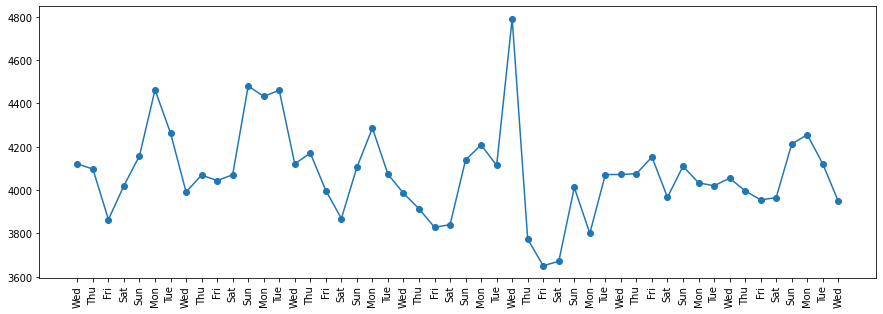

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(range(50),english['English'][:50], '-o',)
plt.xticks(range(0,50), english['Day'][:50],rotation = 90)
plt.show()

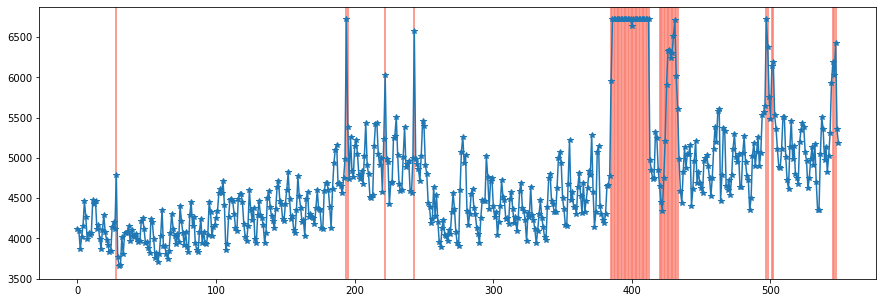

In [ ]:
english_exog = english.loc[english.Exog == 1].index
for i in english_exog:
  plt.axvline(x = i,color='#FA8072')
english.English.plot(style='-*')
plt.show()

In [ ]:
train = english.iloc[:500]
test = english.iloc[500:]

In [ ]:
model = SARIMAX(train['English'],exog=train['Exog'],order=(3,1,3),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



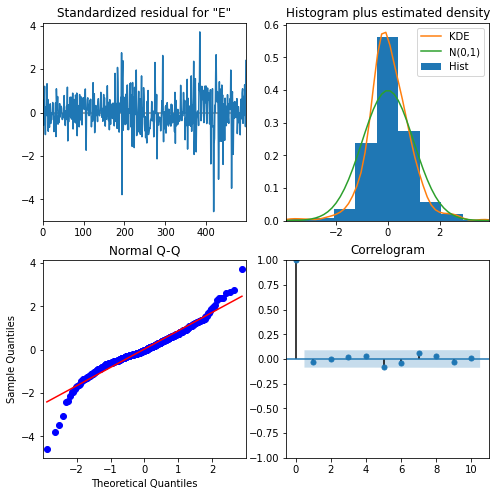

In [ ]:
results.plot_diagnostics(figsize=(8,8));

In [ ]:
start=len(train)
end=len(train)+len(test)-1

In [ ]:
exog_forecast = test[['Exog']]  # requires two brackets to yield a shape of (50,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 271.42
RMSE : 334.739
MAPE: 0.054


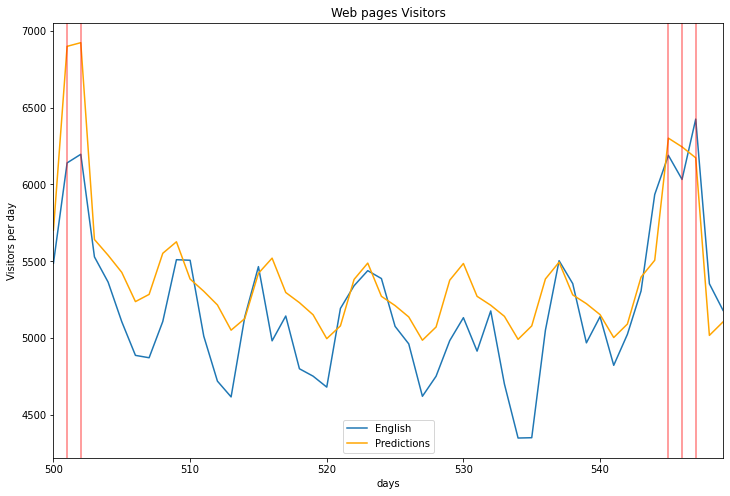

In [ ]:
performance(test['English'], predictions)
# Plot predictions against known values
title='Web pages Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['English'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

We cannot use SARIMAX on other languages since exogenous variables which contains the dates when the campaign was run is applicable only to english.

MAPE for English Language for multiple models:

* Mean Model : 10.2%
* Naive Model : 13.3%
* ARIMA Model : 16.3%
* SARIMA Model : 11.4%
* SARIMAX Model : 5.4%

SARIMAX model has the lowest MAPE scores for English language

#**Auto Arima for all languages**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(train['English'], exogenous = train['Exog'],seasonal=True, m=12)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  500
Model:             SARIMAX(2, 1, 4)x(1, 0, [], 12)   Log Likelihood               -3525.261
Date:                             Wed, 14 Sep 2022   AIC                           7066.522
Time:                                     12:14:30   BIC                           7100.223
Sample:                                          0   HQIC                          7079.747
                                             - 500                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2418      0.005    264.693      0.000       1.233       1.251
ar.L2         -0.9957      0.004   -227.463      0.000      -1.004      -0.987
ma.L1         -1.4273      0.032    -44.144      0.000      -1.491      -1.364
ma.L2          1.0694      0.075     14.283      0.000       0.923       1.216
ma.L3         -0.0099      0.077     -0.129      0.897      -0.161       0.141
ma.L4         -0.1632      0.049     -3.301      0.001      -0.260      -0.066
ar.S.L12      -0.1464      0.062     -2.367      0.018      -0.268      -0.025
sigma2       9.42e+04   3806.674     24.746      0.000    8.67e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              1461.43
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               3.58   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE : 732.838
RMSE : 800.075
MAPE: 0.147


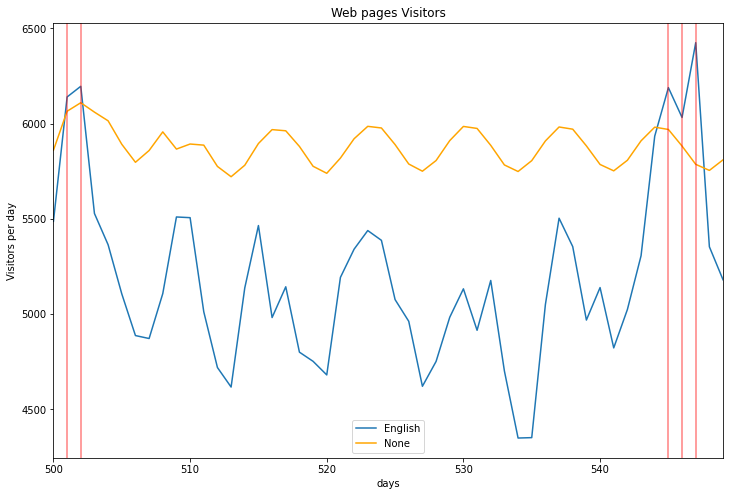

In [ ]:
forecasts = model.predict(test.shape[0],exogenous = test['Exog'])
performance(test['English'], forecasts)
# Plot predictions against known values
title='Web pages Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['English'].plot(legend=True,figsize=(12,8),title=title)
forecasts.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

In [ ]:
train_x['Exog'] = train['Exog']
test_x['Exog'] = test['Exog']

**Pipeline for multiple languages**

In [ ]:
# for i in all_languages.set_index('index').drop(columns=['Exog']).columns:
#   print("Performance Metrics after Auto Arima for ",i)
#   model = pm.auto_arima(train_x[i], exogenous = train_x['Exog'],seasonal=True, m=12)
#   forecasts = model.predict(test_x.shape[0],exogenous = test_x['Exog'])
#   performance(test_x[i], forecasts)
#   print('********')

Performance Metrics after Auto Arima for  English
MAE : 732.838
RMSE : 800.075
MAPE: 0.147
********
Performance Metrics after Auto Arima for  Chinese
MAE : 29.234
RMSE : 33.155
MAPE: 0.079
********
Performance Metrics after Auto Arima for  French
MAE : 55.491
RMSE : 63.159
MAPE: 0.08
********
Performance Metrics after Auto Arima for  Media
MAE : 20.054
RMSE : 25.428
MAPE: 0.12
********
Performance Metrics after Auto Arima for  Russian
MAE : 129.625
RMSE : 146.541
MAPE: 0.136
********
Performance Metrics after Auto Arima for  German
MAE : 62.386
RMSE : 78.629
MAPE: 0.069
********
Performance Metrics after Auto Arima for  Japanese
MAE : 51.857
RMSE : 69.023
MAPE: 0.063
********
Performance Metrics after Auto Arima for  Spanish
MAE : 310.824
RMSE : 351.83
MAPE: 0.296
********


MAPE for different languages (AUTO ARIMA)

 * English : 14.7%
 * Chinese : 7.9%
 * French : 8%
 * Media : 12%
 * Russian : 13.6%
 * German : 6.9%
 * Japanese : 6.3%
 * Spanish : 29.8%

#**Regression Model for Predicting**

In [ ]:
df_reg = all_languages[['index','English']]
df_reg['dayoftheweek'] = df_reg['index'].apply(lambda x : x.strftime('%a'))
df_reg['month'] = df_reg['index'].apply(lambda x : x.strftime('%b'))
df_reg['day'] = df_reg['index'].apply(lambda x : x.strftime('%d'))
df_reg['exog'] = exog['Exog']
df_reg['year'] = df_reg['index'].apply(lambda x : x.strftime('%Y'))
df_reg ['dayoftheweek_mod'] = df_reg.groupby('dayoftheweek')['English'].transform("mean")
df_reg['month_mod'] = df_reg.groupby('month')['English'].transform('mean')
df_reg['day_mod'] = df_reg.groupby('day')['English'].transform('mean')
df_reg['exog_mod'] = df_reg.groupby('exog')['English'].transform('mean')
df_reg['year_mod'] = df_reg.groupby('year')['English'].transform('mean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_reg

index      English dayoftheweek month day  exog  year  \
0   2015-07-01  4120.242704          Wed   Jul  01     0  2015   
1   2015-07-02  4096.969675          Thu   Jul  02     0  2015   
2   2015-07-03  3863.318780          Fri   Jul  03     0  2015   
3   2015-07-04  4020.385549          Sat   Jul  04     0  2015   
4   2015-07-05  4157.757910          Sun   Jul  05     0  2015   
..         ...          ...          ...   ...  ..   ...   ...   
545 2016-12-27  6189.329381          Tue   Dec  27     1  2016   
546 2016-12-28  6032.638712          Wed   Dec  28     1  2016   
547 2016-12-29  6425.295920          Thu   Dec  29     1  2016   
548 2016-12-30  5353.679346          Fri   Dec  30     0  2016   
549 2016-12-31  5180.347343          Sat   Dec  31     0  2016   

     dayoftheweek_mod    month_mod      day_mod     exog_mod     year_mod  
0         4706.964616  4748.511696  4636.152590  4534.670657  4187.098890  
1         4613.741957  4748.511696  4764.628815  4534.670657  4187.098890  
2         4457.273061  4748.511696  4800.202942  4534.670657  4187.098890  
3         4531.955619  4748.511696  4842.708189  4534.670657  4187.098890  
4         4846.520563  4748.511696  4836.757160  4534.670657  4187.098890  
..                ...          ...          ...          ...          ...  
545       4785.591868  4759.630547  4731.207528  6303.176385  4970.333264  
546       4706.964616  4759.630547  4712.900959  6303.176385  4970.333264  
547       4613.741957  4759.630547  4858.154231  6303.176385  4970.333264  
548       4457.273061  4759.630547  4696.641551  4534.670657  4970.333264  
549       4531.955619  4759.630547  4807.415557  4534.670657  4970.333264  

[550 rows x 12 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X = df_reg[['dayoftheweek_mod','month_mod','day_mod','exog_mod','year_mod']]
Y = df_reg['English']

In [ ]:
x_train = X[:500]
x_test = X[500:]
y_train = Y[:500]
y_test = Y[500:]

In [ ]:
import statsmodels.api as sm
# x_train = sm.add_constant(x_train)
# x_test = sm.add_constant(x_test)

In [ ]:
finalmodel = sm.OLS(y_train,x_train).fit()
print(finalmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                English   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.476e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:42:01   Log-Likelihood:                         -3685.7
No. Observations:                 500   AIC:                                      7381.
Df Residuals:                     495   BIC:                                      7403.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
print(finalmodel.params)

dayoftheweek_mod    0.426727
month_mod           0.202900
day_mod            -1.100096
exog_mod            0.879754
year_mod            0.585059
dtype: float64


In [ ]:
predictions = finalmodel.predict(x_test)

MAE : 384.664
RMSE : 471.317
MAPE: 0.073


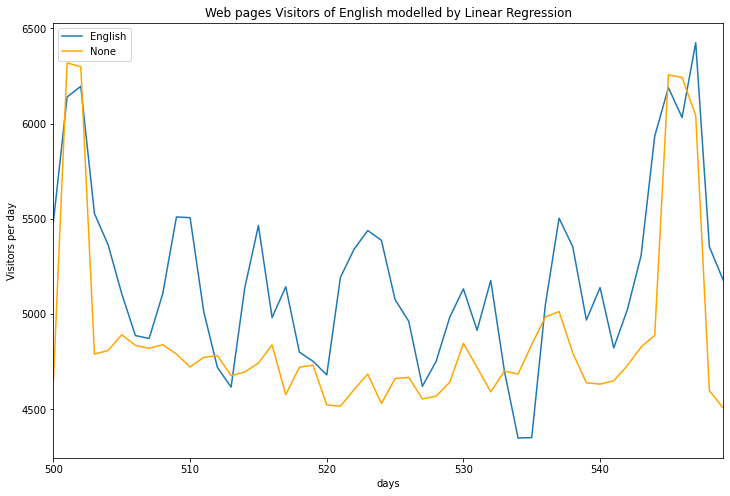

In [ ]:
performance(y_test, predictions)
# Plot predictions against known values
title='Web pages Visitors of English modelled by Linear Regression'
ylabel='Visitors per day'
xlabel='days'
ax = y_test.plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

We used a statstmodel to do a regression model and we achieved a MAPE of 7.3% for English language

**Prophet**

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

Predicting for English page

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/l888gj5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/rtt7g9kf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64990', 'data', 'file=/tmp/tmpvvm15h0a/l888gj5w.json', 'init=/tmp/tmpvvm15h0a/rtt7g9kf.json', 'output', 'file=/tmp/tmptu4ykz_3/prophet_model-20220915110716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:07:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:07:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


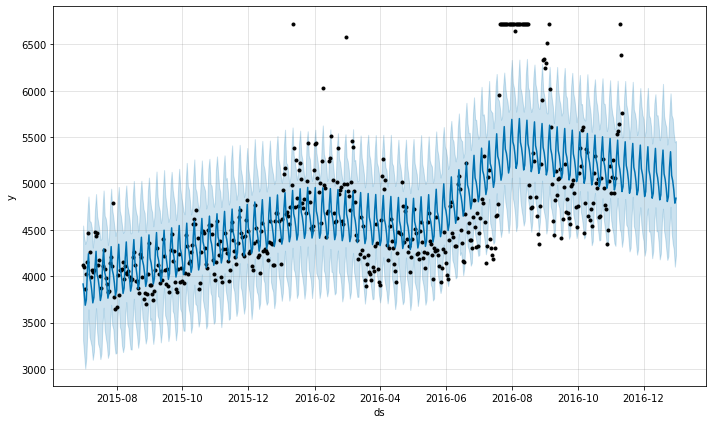

In [ ]:
fb_train = all_languages[['index','English']][:500]
fb_test = all_languages[['index','English']][500:]
fb_train.rename(columns={'index':'ds','English':'y'},inplace=True)
fb_test.rename(columns={'index':'ds','English':'y'},inplace=True)
m = Prophet()
m.fit(fb_train)
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)
fig1 = m.plot(forecast)

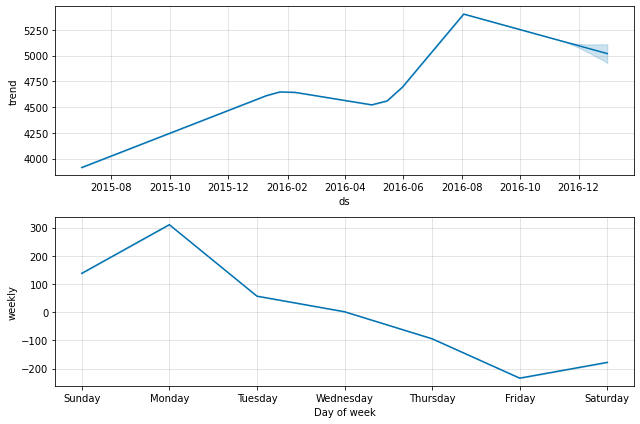

In [ ]:
fig2 = m.plot_components(forecast)

MAE : 300.492
RMSE : 422.376
MAPE: 0.056


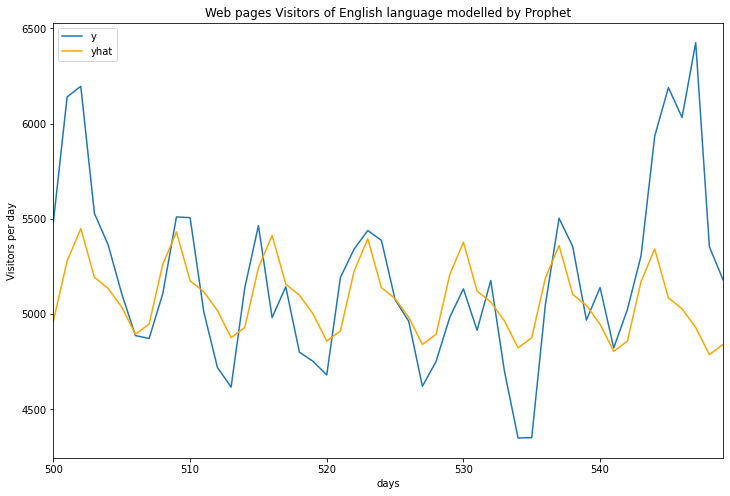

In [ ]:
performance(fb_test['y'], forecast['yhat'][500:])
# Plot predictions against known values
title='Web pages Visitors of English language modelled by Prophet'
ylabel='Visitors per day'
xlabel='days'
ax = fb_test['y'].plot(legend=True,figsize=(12,8),title=title)
forecast['yhat'][500:].plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

Prophet did a good job predicting the number of clicks for english pages with a MAPE of 5.6%

Now, predicting the number of clicks for all langauges

In [ ]:
#Pipeline for all langauges
def prophet_pred(language):
    fb_train = all_languages[['index',language]][:500]
    fb_test = all_languages[['index',language]][500:]
    fb_train.rename(columns={'index':'ds',i:'y'},inplace=True)
    fb_test.rename(columns={'index':'ds',i:'y'},inplace=True)
    m = Prophet()
    m.fit(fb_train)
    future = m.make_future_dataframe(periods=50)
    forecast = m.predict(future)
    print("Predictions for ",language)
    performance(fb_test['y'], forecast['yhat'][500:])
    print('**************************************************')
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    title='Web pages Visitors of ' + i + ' language modelled by Prophet'
    ylabel='Visitors per day'
    xlabel='days'
    fb_test['y'].plot(legend=True,ax=ax,title=title)
    forecast['yhat'][500:].plot(legend=True,color = 'orange')
    ax.autoscale(axis='x',tight=True)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.show()
   

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/hzljkppy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/rsf8b0q5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33992', 'data', 'file=/tmp/tmpvvm15h0a/hzljkppy.json', 'init=/tmp/tmpvvm15h0a/rsf8b0q5.json', 'output', 'file=/tmp/tmp6fqawqib/prophet_model-20220915105901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  Chinese
MAE : 17.694
RMSE : 21.296
MAPE: 0.048
**************************************************


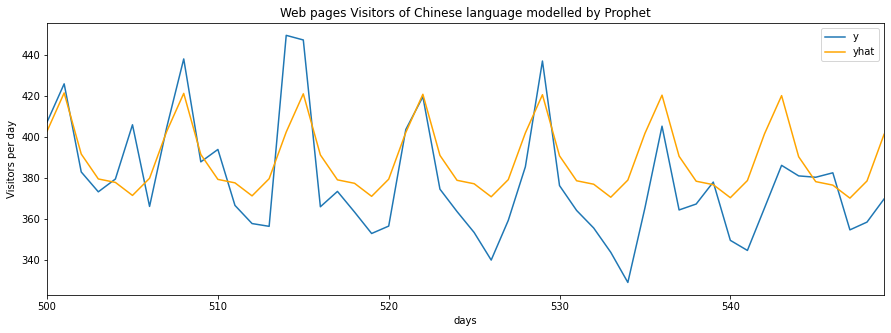

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/xspld_zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/qwa69yco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5251', 'data', 'file=/tmp/tmpvvm15h0a/xspld_zn.json', 'init=/tmp/tmpvvm15h0a/qwa69yco.json', 'output', 'file=/tmp/tmp5g4ofnsg/prophet_model-20220915105903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  French
MAE : 41.982
RMSE : 51.652
MAPE: 0.059
**************************************************


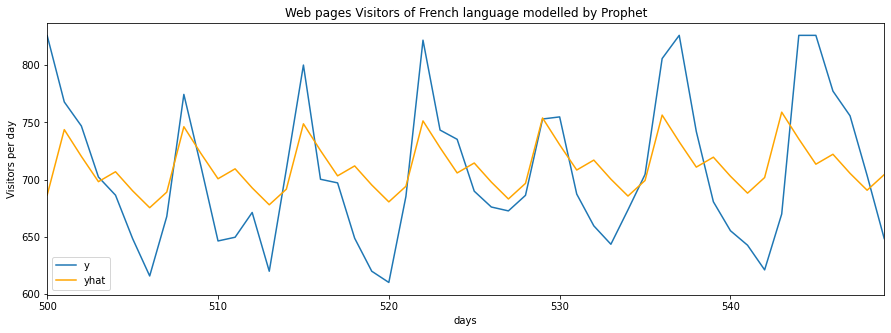

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/5ehhdujl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/hofm61lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26457', 'data', 'file=/tmp/tmpvvm15h0a/5ehhdujl.json', 'init=/tmp/tmpvvm15h0a/hofm61lr.json', 'output', 'file=/tmp/tmp2p3sokau/prophet_model-20220915105905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  Media
MAE : 25.512
RMSE : 29.618
MAPE: 0.161
**************************************************


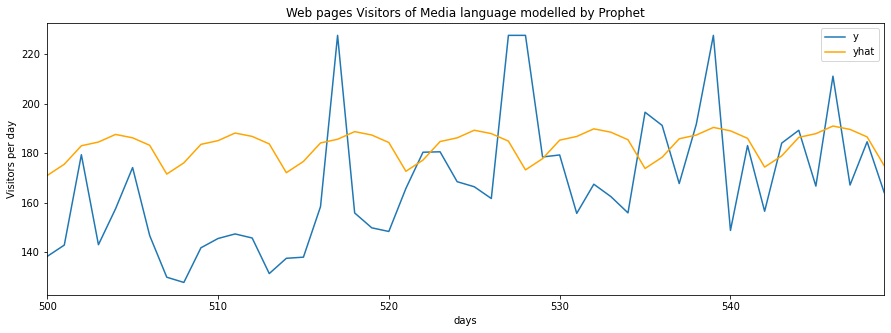

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/c2q45igb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/212e2315.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95862', 'data', 'file=/tmp/tmpvvm15h0a/c2q45igb.json', 'init=/tmp/tmpvvm15h0a/212e2315.json', 'output', 'file=/tmp/tmp5dpf8ih8/prophet_model-20220915105907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  Russian
MAE : 54.819
RMSE : 72.789
MAPE: 0.053
**************************************************


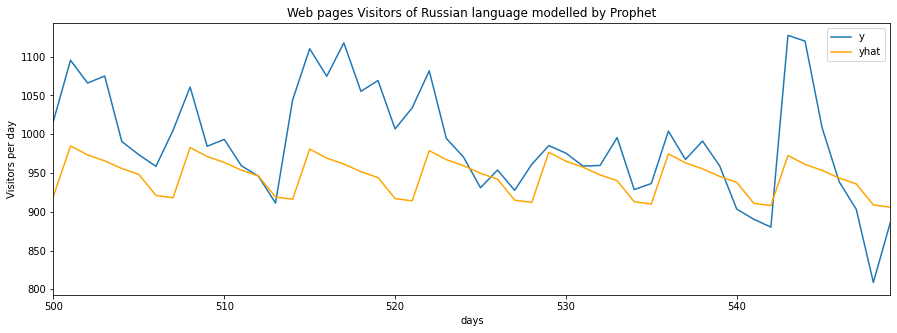

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/dcpbhj5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/c2aof7mz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80287', 'data', 'file=/tmp/tmpvvm15h0a/dcpbhj5v.json', 'init=/tmp/tmpvvm15h0a/c2aof7mz.json', 'output', 'file=/tmp/tmpim4z4np6/prophet_model-20220915105909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  German
MAE : 56.974
RMSE : 72.298
MAPE: 0.06
**************************************************


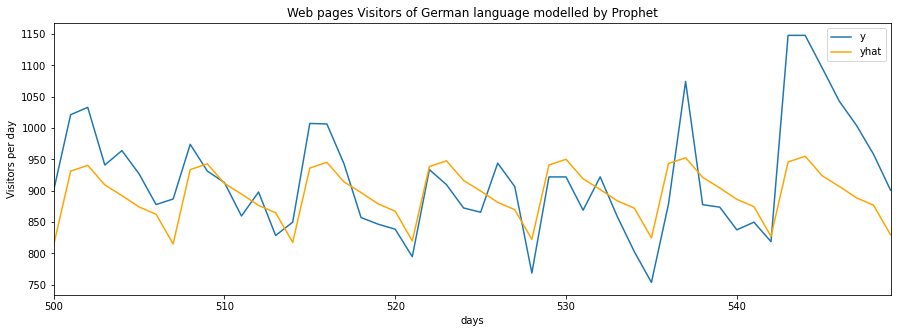

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/3akvfgkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/hw44i72v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18072', 'data', 'file=/tmp/tmpvvm15h0a/3akvfgkg.json', 'init=/tmp/tmpvvm15h0a/hw44i72v.json', 'output', 'file=/tmp/tmpy362l83_/prophet_model-20220915105911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  Japanese
MAE : 52.621
RMSE : 69.032
MAPE: 0.065
**************************************************


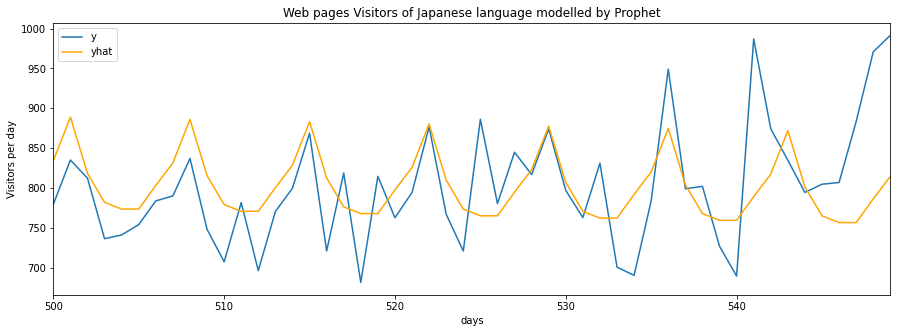

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/arhf0e73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvm15h0a/9342jllq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32570', 'data', 'file=/tmp/tmpvvm15h0a/arhf0e73.json', 'init=/tmp/tmpvvm15h0a/9342jllq.json', 'output', 'file=/tmp/tmpvsc9acds/prophet_model-20220915105913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for  Spanish
MAE : 224.349
RMSE : 261.575
MAPE: 0.212
**************************************************


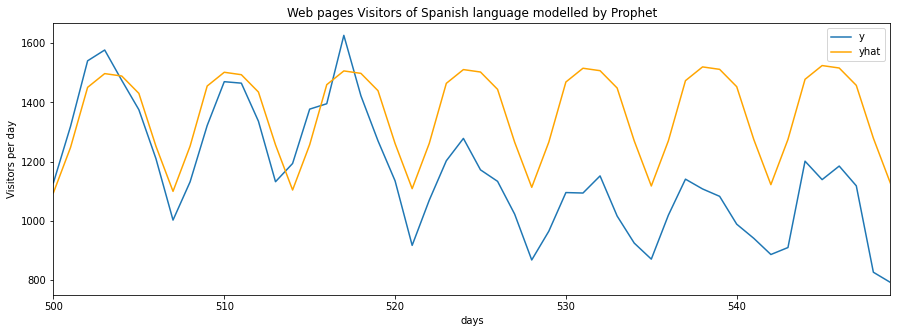

In [ ]:
for i in all_languages.set_index('index').drop(columns=['Exog','English']).columns:
  prophet_pred(i)

**Observations**

MAPE for Predictions
* English MAPE : 5.6%
* Chinese MAPE : 4.8%
* French MAPE : 5.9%
* Media MAPE : 16.1%
* Russian MAPE : 5.3%
* German MAPE : 6%
* Japanese MAPE : 6.5%
* Spanish MAPE : 21.2%

Apart from Media pages and Spanish page, FB prophet has done a great job on all langauges

Questionnaire:

1. Defining the problem statements and where can this and modifications of this be used?
> Forecasting the number of views so that we can predict and optimize the ad placement for our clients. This can be further used for influencer marketing campaigns. To determine how many views a post would get 

2. Write 3 inferences you made from the data visualizations
> 1. JPG/JPEG pages are stationary and has no trend and seasonality making it unreliable for placing an ad 
> 2. English language has the most number of wiki pages and spanish contains the least number
> 3. Wikipedia pages have significantly higher average views than wikimedia pages

3. What does the decomposition of series do?
> Decomposing a time series gives us trend, seasonality and residuals

4. What level of differencing gave you a stationary series?
> Some of the languages did not need differencing for stationarity like Media, Russian and Spanish

5. Difference between arima, sarima & sarimax.
> ARIMA considers the trend and resiudals , while SARIMA considers trend, seasonality and residuals and lastly SARIMAX considers trend, seasonality, residuals and exogenous variables for prediction.

6. Compare the number of views in different languages
> The average number of views/day for 
> 1. English = 4430
> 2. Spanish = 1226
> 3. Russian = 968
> 4. French = 651
> 5. Chinese = 334
> 6. Media = 130

7. What other methods other than grid search would be suitable to get the model for all languages?
>We can use Auto ARIMA

**Infernces** 

1. The data consists of JPG/JPEG pages which are stationary
2. There is a group of pages called Wikimedia pages in the dataset. Wikimedia is the parent company of wikipedia. The average views on wikimedia pages are far fewer than wikipedia
3. English language has the highest number of web pages in wikipedia and they also have the highest average clicks per webpage
4. Media, Russian and Spanish pages are stationary time series data


**Recommendations**

1. Ad sense should not put out any ads on JPG/JPEG pages since the number of views for such pages is low.
2. Wikipedia pages should be preferred over Wikimedia pages for ad placement considering that they have higher number of average visits
3. Ad sense should provide cost estimate for each web page so that way it will be helpful to calculate cost per view.